In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


*Resources used: Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow book by Aurélien Géron, ChatGPT-4o, Google Gemini*

## Applied Machine Learning HW 3 Q1, Group 36, **Jack Tyndall**

In [3]:
import os
from PIL import Image
from torch.utils.data import Dataset
from transformers import CLIPProcessor

class ClipImageDataset(Dataset):
    def __init__(self, root_dir, condition, categories, processor):
        """
        root_dir: top-level directory containing condition folders
        condition: name of the condition folder (e.g. 'realistic')
        categories: list of category names
        processor: CLIPProcessor
        """
        self.processor = processor
        self.categories = categories
        self.image_paths = []
        self.labels = []

        base_path = os.path.join(root_dir, condition)

        for label_idx, category in enumerate(categories):
            folder = os.path.join(base_path, category)
            for filename in os.listdir(folder):
                if filename.lower().endswith(("jpg", "png", "jpeg")):
                    self.image_paths.append(os.path.join(folder, filename))
                    self.labels.append(label_idx)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        path = self.image_paths[idx]
        label = self.labels[idx]

        image = Image.open(path).convert("RGB")

        # Preprocess for CLIP
        processed = self.processor(images=image, return_tensors="pt")

        # processor returns tensors with shape [1, C, H, W], so we squeeze
        processed["pixel_values"] = processed["pixel_values"].squeeze(0)

        return processed["pixel_values"], label, path


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (41,) + inhomogeneous part.

In [ ]:
from transformers import CLIPModel, CLIPProcessor
from torch.utils.data import DataLoader

categories = ["airplane", "car", "chair", "cup", "dog", "donkey", "duck", "hat"]

processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")

dataset = ClipImageDataset(
    root_dir="data",
    condition="realistic",
    categories=categories,
    processor=processor
)

real_path = "/content/drive/MyDrive/HW3/v0/realistic"
real_images, real_names = load_and_preprocess_images(real_path)

dataloader = DataLoader(dataset, batch_size=1, shuffle=False)

In [ ]:

results = {}
pcas = {}

for cond in image_list:
    X = image_list[cond]

    # PCA (full dimensionality)
    pca = PCA(n_components=None, svd_solver="full")
    pca.fit(X)

    pcas[cond] = pca

    # cumulative explained variance
    cumvar = np.cumsum(pca.explained_variance_ratio_)

    # find # of PCs to reach 95%
    k = np.argmax(cumvar >= 0.95) + 1
    results[cond] = k

    print(cond)
    print(f"  Images loaded: {X.shape[0]}")
    print(f"  Dimensionality: {X.shape[1]} features")
    print(f"  Components needed for 95% variance: {k}")

real
  Images loaded: 41
  Dimensionality: 16384 features
  Components needed for 95% variance: 30
sil
  Images loaded: 40
  Dimensionality: 16384 features
  Components needed for 95% variance: 30
geon
  Images loaded: 60
  Dimensionality: 16384 features
  Components needed for 95% variance: 35
feature
  Images loaded: 42
  Dimensionality: 16384 features
  Components needed for 95% variance: 31
blur
  Images loaded: 42
  Dimensionality: 16384 features
  Components needed for 95% variance: 15


### **HW3Q1 1.**

Images loaded in, gray scaled, and reduced to 128x128. Each condition is stored in a dict.

Each number of components needed for 95% variance is displayed, and it tracks that the higher quality, more full images, require more components to maintain variance. Blurred images, which had little detail, required the least amount of components, while geons, which appear to be high definition simple 3D renderings, require the most.


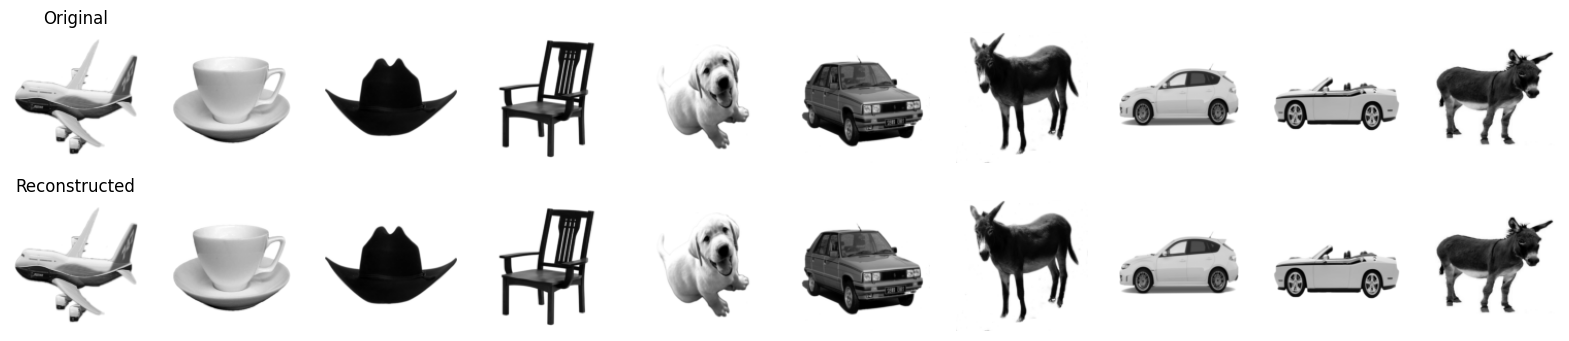

In [ ]:
import matplotlib.pyplot as plt


np.random.seed(51)
indices = np.random.choice(image_list['real'].shape[0], size=10, replace=False)
original_images = image_list['real'][indices]

# First, transform the original images into the PCA space
original_images_pca = pcas['real'].transform(original_images)
# Then, inverse transform from the PCA space to reconstruct the images
reconstructed = pcas['real'].inverse_transform(original_images_pca)

plt.figure(figsize=(20, 4))

for i in range(10):
    # Original
    plt.subplot(2, 10, i+1)
    # Reshape the flattened image back to its original 2D size for plotting
    plt.imshow(original_images[i].reshape(IMAGE_SIZE), cmap='gray')
    plt.axis('off')
    if i == 0:
        plt.title("Original", fontsize=12)

    # Reconstructed
    plt.subplot(2, 10, i+11)
    # Reshape the flattened reconstructed image back to its original 2D size for plotting
    plt.imshow(reconstructed[i].reshape(IMAGE_SIZE), cmap='gray')
    plt.axis('off')
    if i == 0:
        plt.title("Reconstructed", fontsize=12)

plt.show()

### **HW3Q1 2.**

Images look good! Good job PCA :D!

In [ ]:
results = {}
pcas = {}

for cond in image_list:
    X = image_list[cond]

    # PCA (full dimensionality)
    pca = PCA(n_components=2, svd_solver="full")
    pca.fit(X)

    pcas[cond] = pca

    explained_var = pca.explained_variance_ratio_
    total_explained = explained_var.sum()

    results[cond] = total_explained

    print(cond)
    print(f"  PC1 variance: {explained_var[0]:.4f}")
    print(f"  PC2 variance: {explained_var[1]:.4f}")
    print(f"  Total variance explained by first 2 PCs: {total_explained:.4f}\n")

real
  PC1 variance: 0.1558
  PC2 variance: 0.1366
  Total variance explained by first 2 PCs: 0.2924

sil
  PC1 variance: 0.2032
  PC2 variance: 0.1158
  Total variance explained by first 2 PCs: 0.3190

geon
  PC1 variance: 0.2776
  PC2 variance: 0.1132
  Total variance explained by first 2 PCs: 0.3908

feature
  PC1 variance: 0.1239
  PC2 variance: 0.0993
  Total variance explained by first 2 PCs: 0.2232

blur
  PC1 variance: 0.3538
  PC2 variance: 0.1458
  Total variance explained by first 2 PCs: 0.4996



In [ ]:
classes = ['AIR', 'CAR', 'CHA', 'CUP', 'DOG', 'DON', 'DUC', 'HAT']
prefixes = {}
for cond in name_list:
  prefixes[cond] = [f[:3].upper() for f in name_list[cond]]



In [ ]:
from sklearn.manifold import TSNE, LocallyLinearEmbedding
import umap
from matplotlib.cm import get_cmap

#temp fix
#prefixes['geon'].remove('PAG')
#image_list['geon'] = np.delete(image_list['geon'], 39)

label_to_int = {cls: i for i, cls in enumerate(classes)}
cmap = get_cmap('tab10')  # 10 distinct colors
y_ints = {}
for cond in prefixes:
  y_ints[cond] = np.array([label_to_int[label] for label in prefixes[cond]])

def plot_2d_embedding(X_embedded, y_int, title):
    plt.figure(figsize=(10,8))
    for i, cls in enumerate(classes):
        plt.scatter(X_embedded[y_int==i, 0], X_embedded[y_int==i, 1],
                    label=cls, alpha=0.7, s=50, color=cmap(i))
    plt.legend()
    plt.title(title, fontsize=16)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.show()


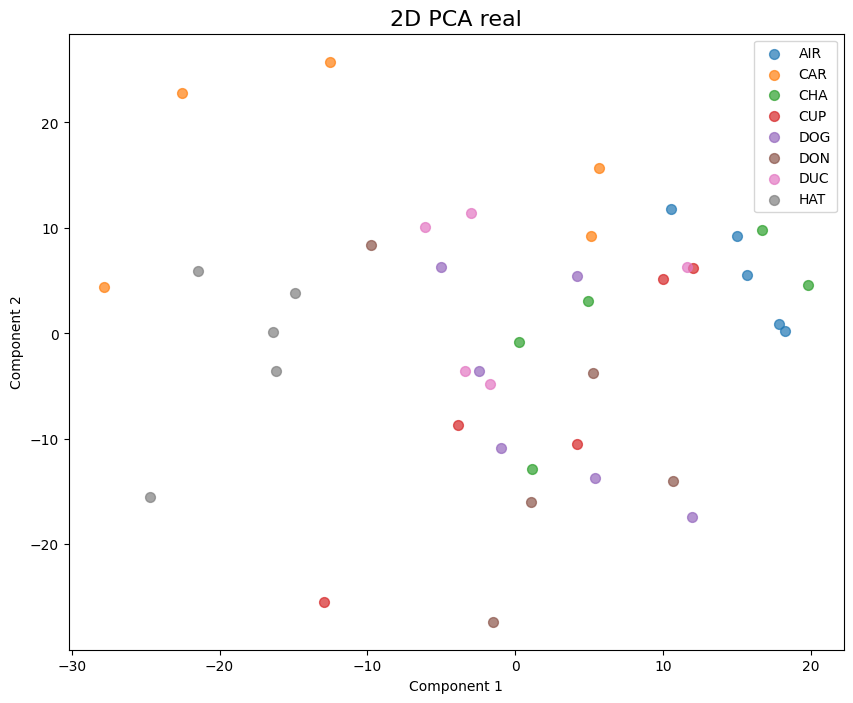

real
Variance explained by 2 PCs: 0.29244137707451345


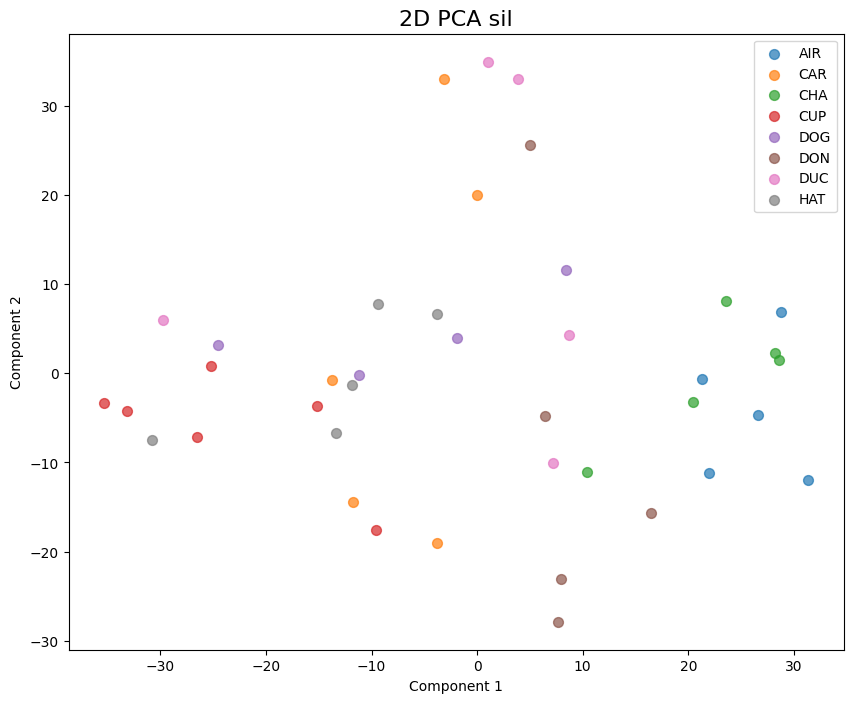

sil
Variance explained by 2 PCs: 0.3189914122177083


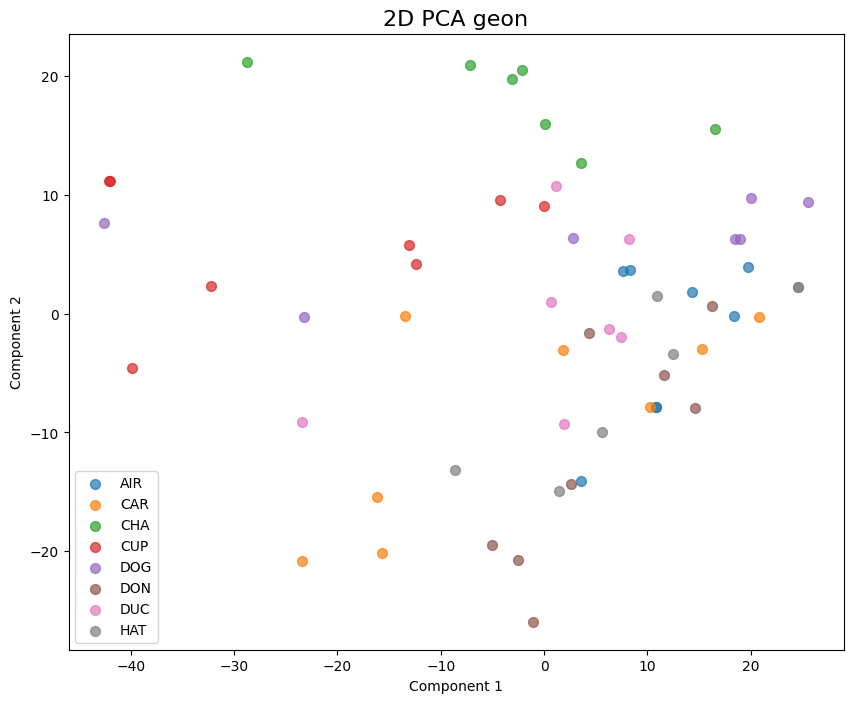

geon
Variance explained by 2 PCs: 0.3907903142906338


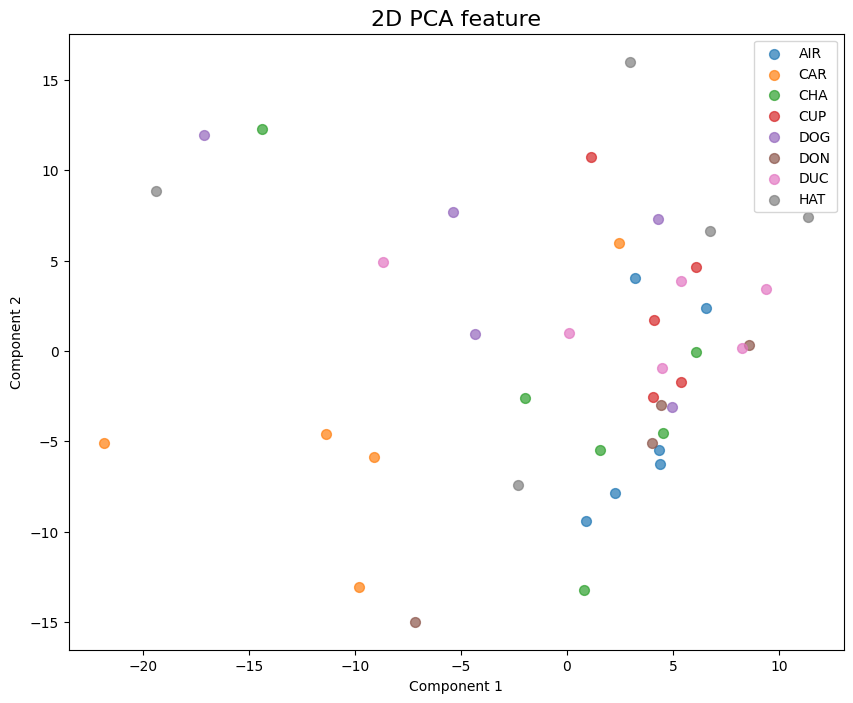

feature
Variance explained by 2 PCs: 0.22323596423294506


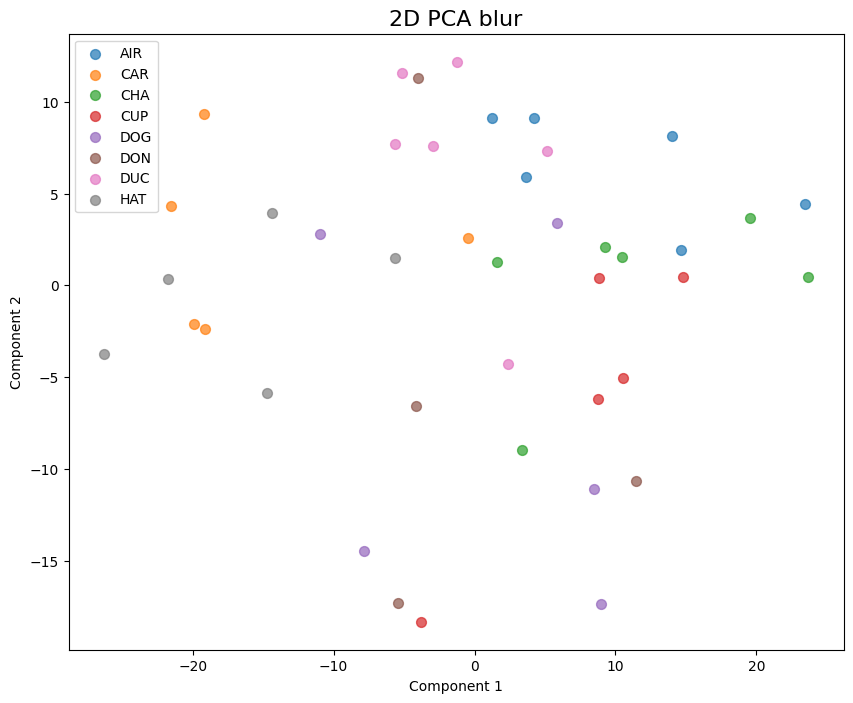

blur
Variance explained by 2 PCs: 0.49960846712955576


In [ ]:
#PCA Plots
for cond in image_list:
  X = image_list[cond]
  pca = PCA(n_components=2, svd_solver="full")
  X_pca = pca.fit_transform(X)
  plot_2d_embedding(X_pca, y_ints[cond], "2D PCA " + cond)
  print(cond)
  print("Variance explained by 2 PCs:", np.sum(pca.explained_variance_ratio_))




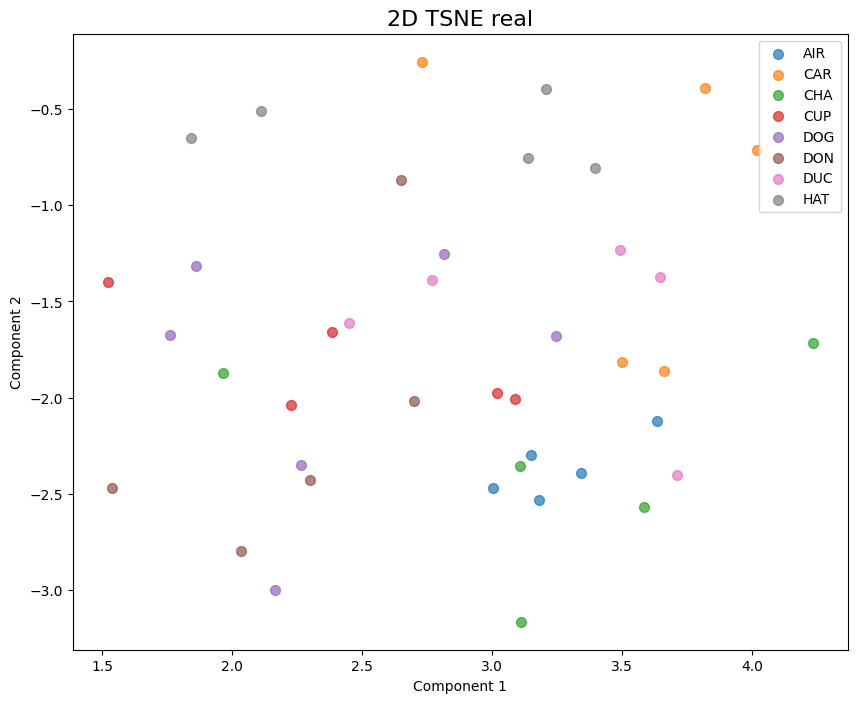

real


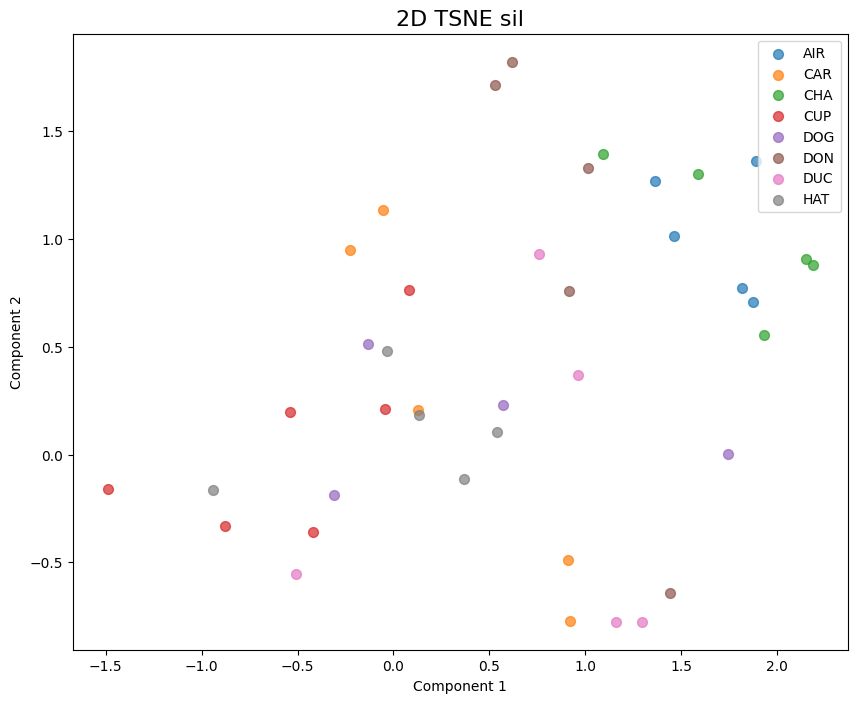

sil


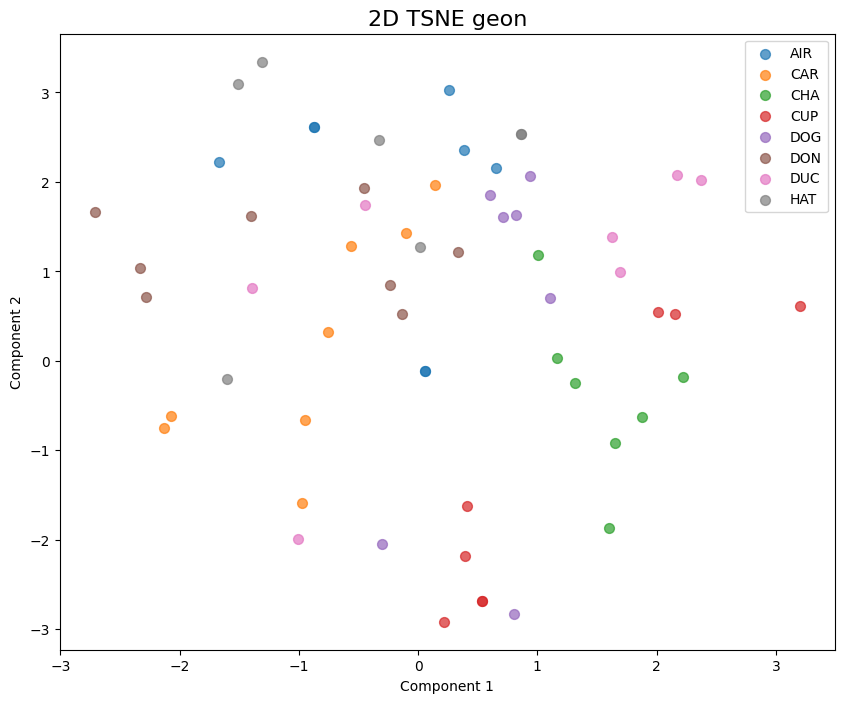

geon


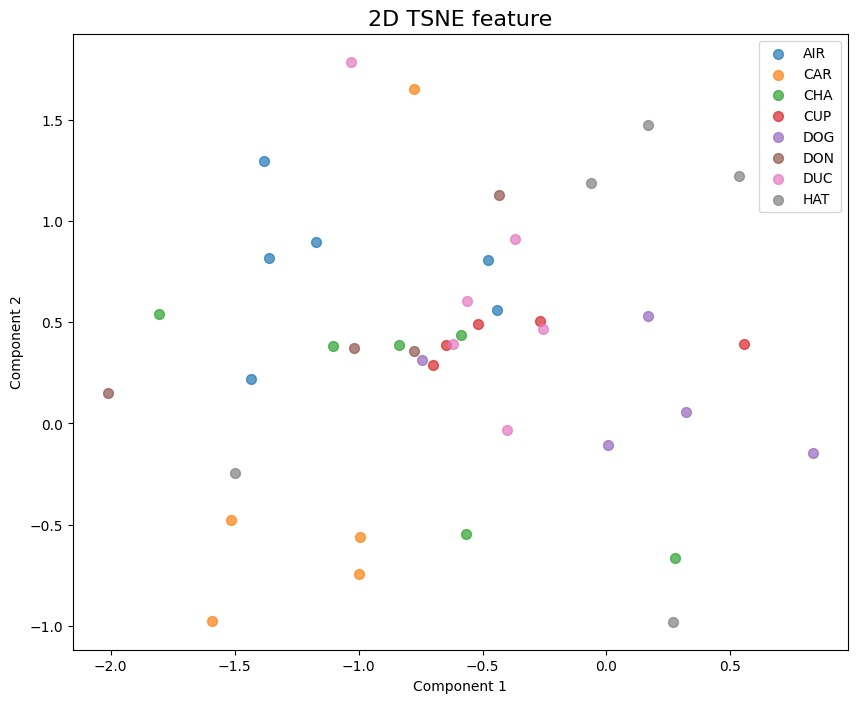

feature


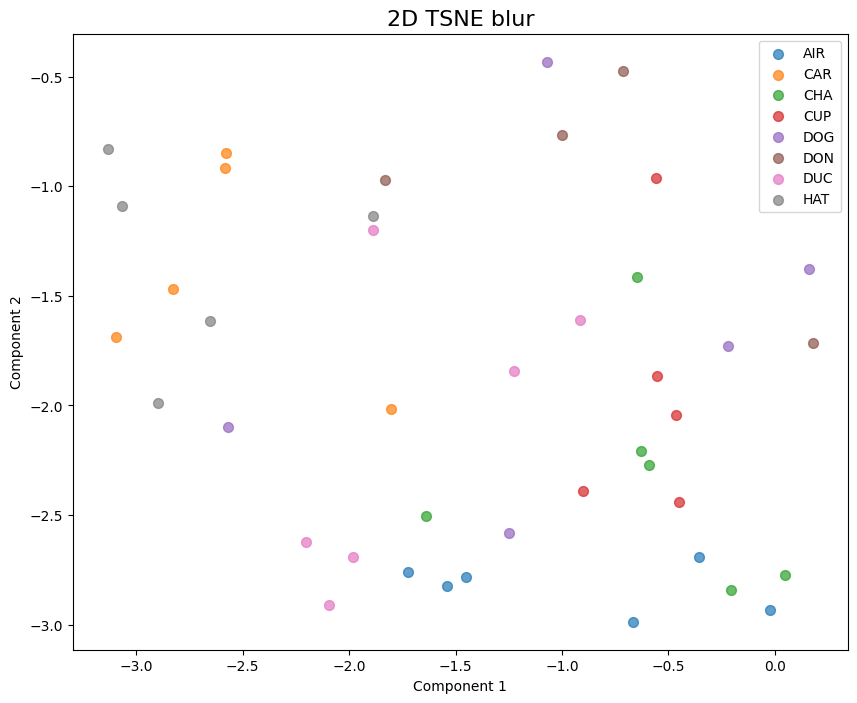

blur


In [ ]:
#TSNE Plots
for cond in image_list:
  X = image_list[cond]
  tsne = TSNE(n_components=2, random_state=51)
  X_tsne = tsne.fit_transform(X)
  plot_2d_embedding(X_tsne, y_ints[cond], "2D TSNE " + cond)
  print(cond)

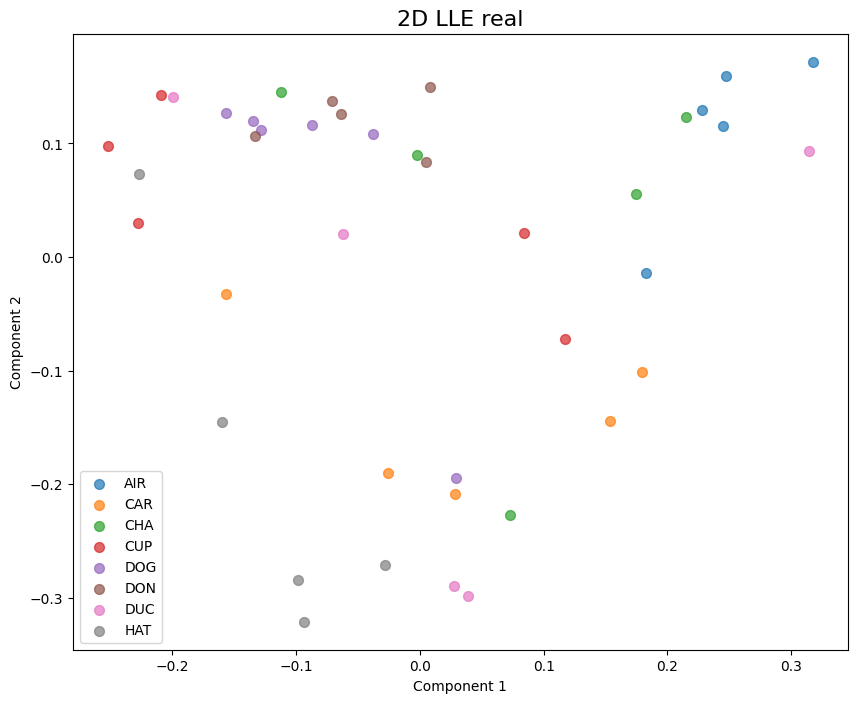

real


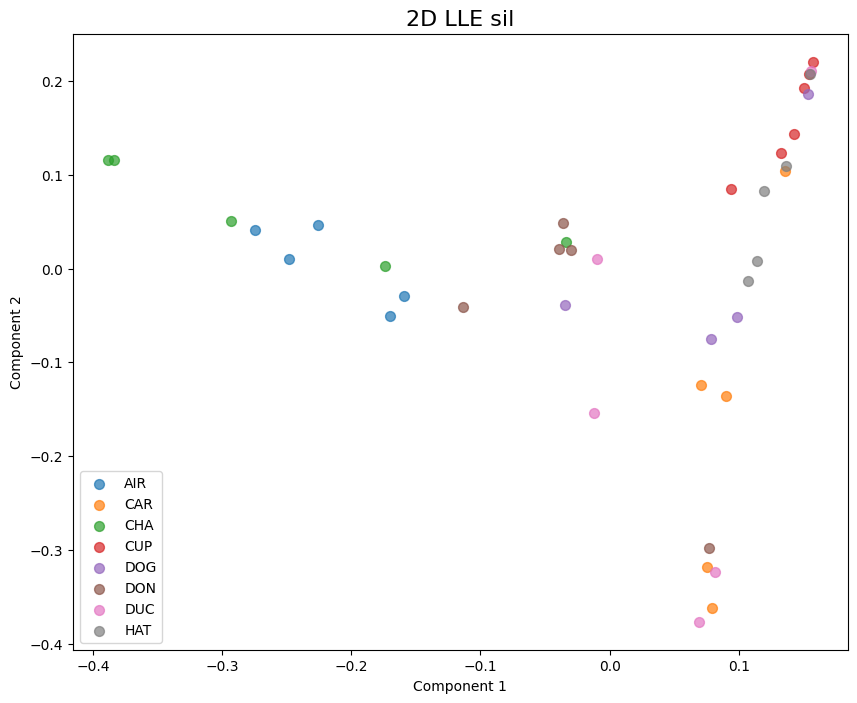

sil


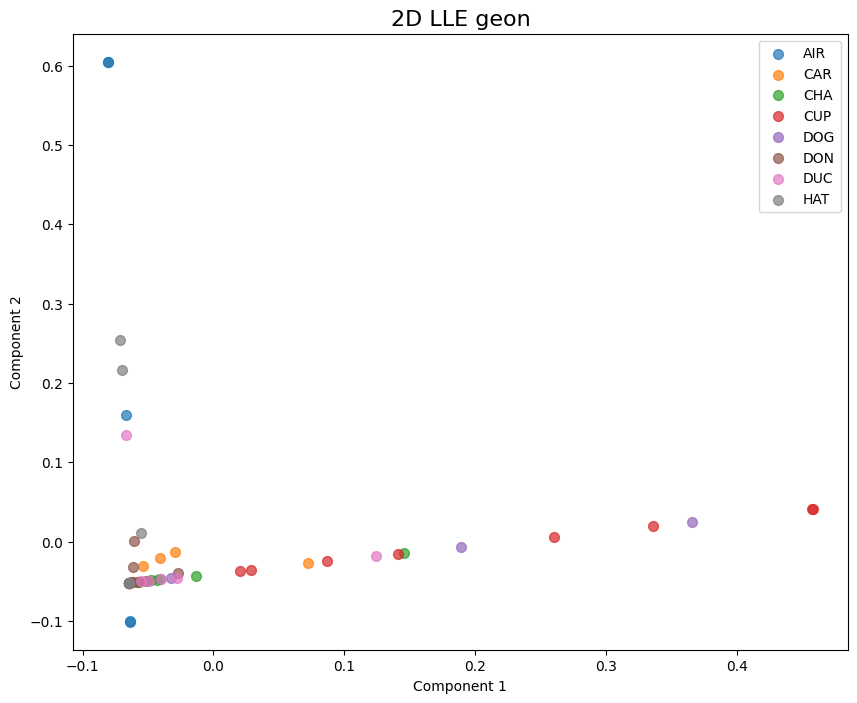

geon


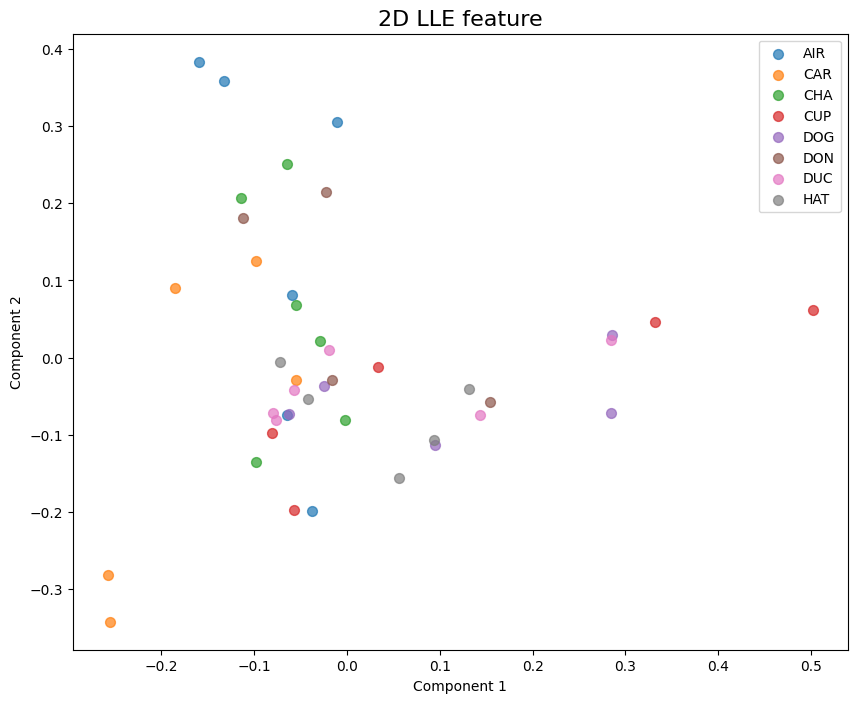

feature


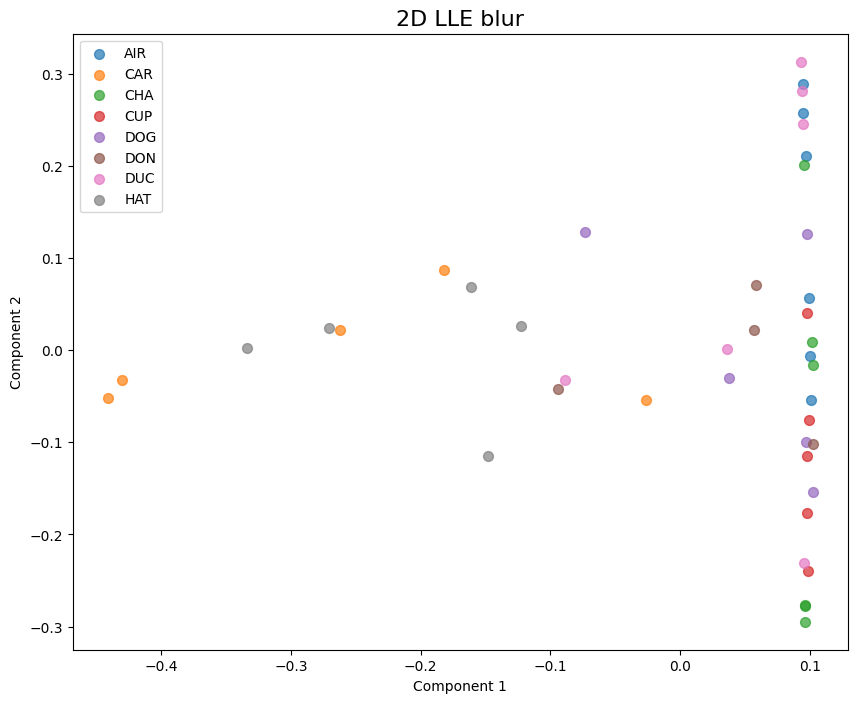

blur


In [ ]:
#LLE Plots
for cond in image_list:
  X = image_list[cond]
  lle = LocallyLinearEmbedding(n_components=2, random_state=51)
  X_lle = lle.fit_transform(X)
  plot_2d_embedding(X_lle, y_ints[cond], "2D LLE " + cond)
  print(cond)


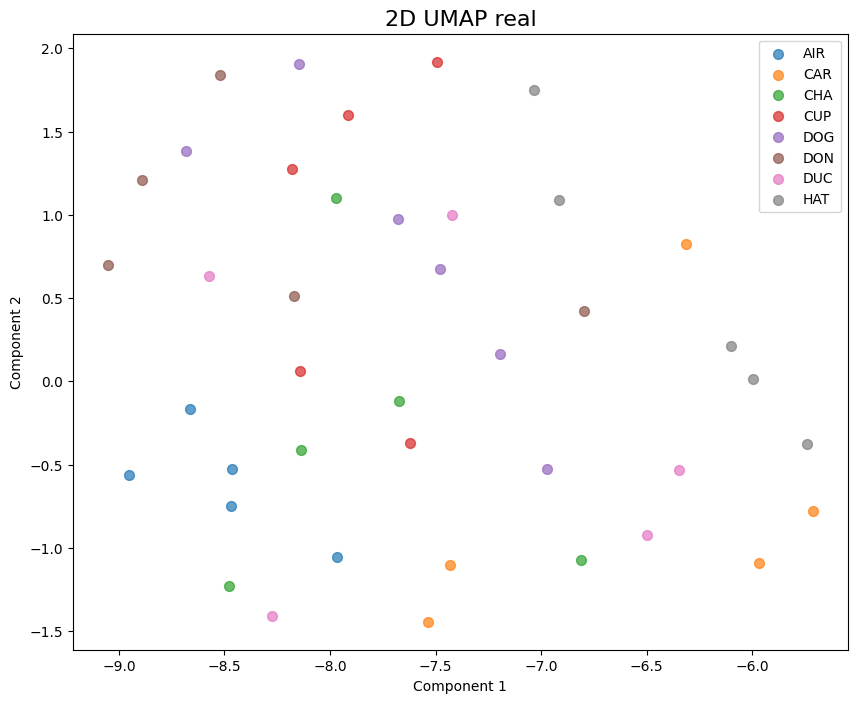

real


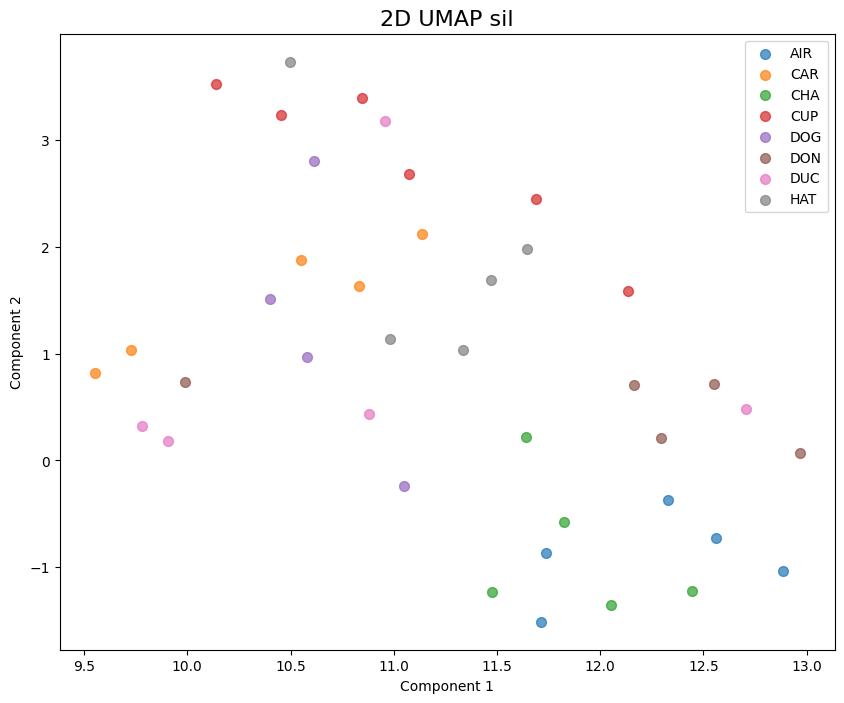

sil


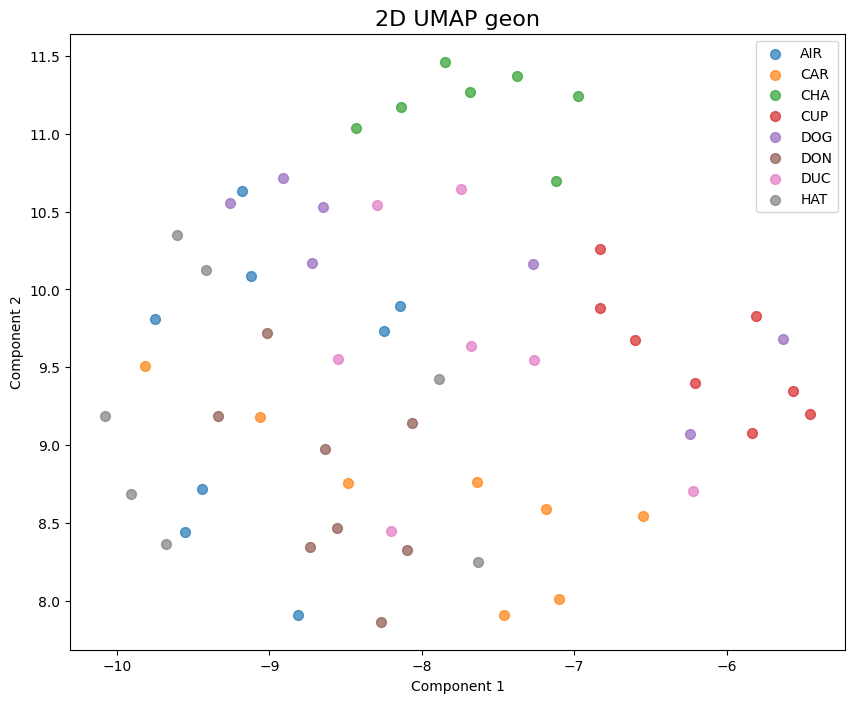

geon


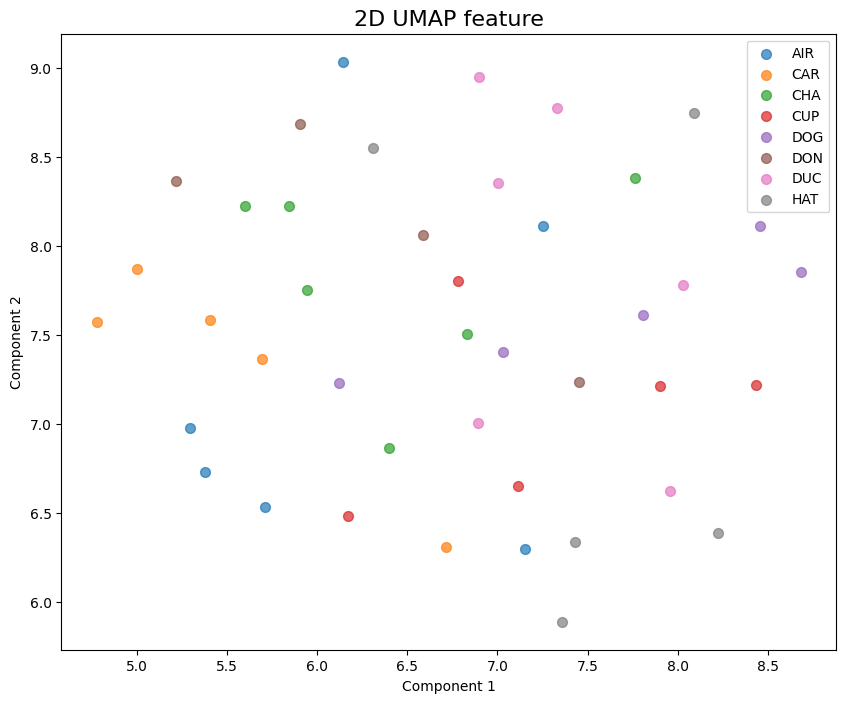

feature


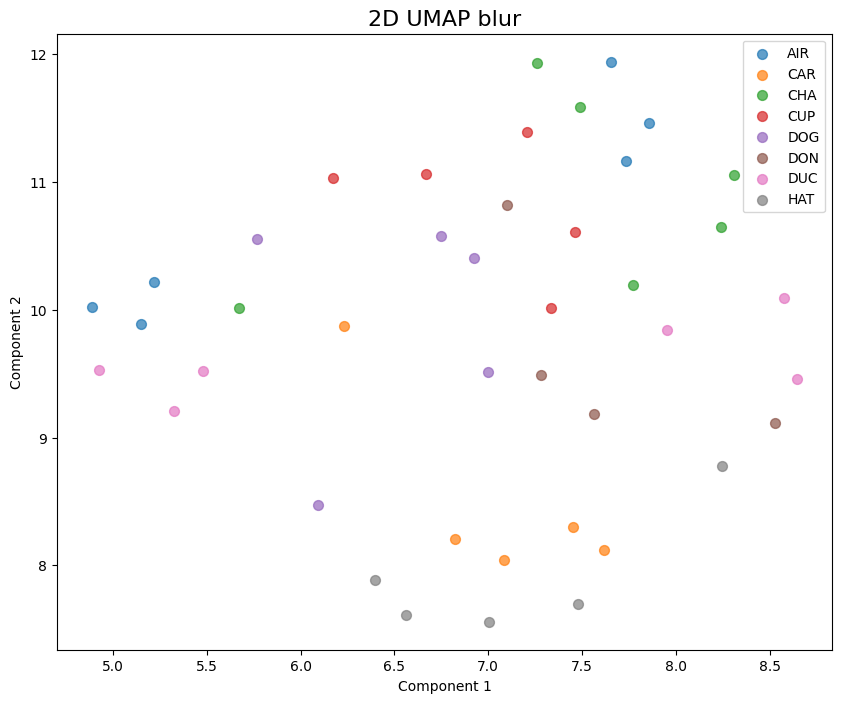

blur


In [ ]:
#UMAP Plots
for cond in image_list:
  X = image_list[cond]
  umapper = umap.UMAP(n_components=2, random_state=51)
  X_umap = umapper.fit_transform(X)
  plot_2d_embedding(X_umap, y_ints[cond], "2D UMAP " + cond)
  print(cond)



### **HW3Q1 3.**

Behold above, scatter plots.


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

pcas = {}
reduced = {}
for cond in image_list:
  X = image_list[cond]
  pca = PCA(n_components=0.95, svd_solver="full")
  X_pca = pca.fit_transform(X)

  pcas[cond] = pca
  reduced[cond] = X_pca



best_k = {}
sil_scores = {}

for cond in reduced:
    scores = {}
    print(f"\nEvaluating k for {cond}")

    for k in range(2, 11):  # test k = 2..10
        kmeans = KMeans(n_clusters=k, random_state=51, n_init='auto')
        labels = kmeans.fit_predict(reduced[cond])
        score = silhouette_score(reduced[cond], labels)
        scores[k] = score

    best_k_value = max(scores, key=scores.get)
    best_k[cond] = best_k_value
    sil_scores[cond] = scores

    print(f"Best k for {cond}: {best_k_value} (silhouette={scores[best_k_value]:.3f})")



Evaluating k for real
Best k for real: 5 (silhouette=0.105)

Evaluating k for sil
Best k for sil: 2 (silhouette=0.125)

Evaluating k for geon
Best k for geon: 2 (silhouette=0.263)

Evaluating k for feature
Best k for feature: 4 (silhouette=0.123)

Evaluating k for blur
Best k for blur: 2 (silhouette=0.242)


### **HW3Q1 4. A**
See above

In [ ]:
kmeans_models = {}
cluster_labels = {}

for cond in reduced:
    k = best_k[cond]
    km = KMeans(n_clusters=k, random_state=51, n_init='auto')
    labels = km.fit_predict(reduced[cond])

    kmeans_models[cond] = km
    cluster_labels[cond] = labels

    print(f"{cond}: KMeans complete (k={k})")

real: KMeans complete (k=5)
sil: KMeans complete (k=2)
geon: KMeans complete (k=2)
feature: KMeans complete (k=4)
blur: KMeans complete (k=2)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.stats import mode
import seaborn as sns

def clustering_accuracy(true_labels, cluster_labels):
    true_labels = np.array(true_labels)
    cluster_labels = np.array(cluster_labels)

    # Map each cluster ID to the majority true label in that cluster
    label_map = {}
    for c in np.unique(cluster_labels):
        mask = (cluster_labels == c)
        majority = mode(true_labels[mask], keepdims=True).mode[0]
        label_map[c] = majority

    # Convert each cluster assignment into its predicted true label
    predicted = np.array([label_map[c] for c in cluster_labels])

    return accuracy_score(true_labels, predicted), predicted

In [ ]:
accuracies = {}

for cond in y_ints:
    acc_score, predicted_labels = clustering_accuracy(y_ints[cond], cluster_labels[cond])
    accuracies[cond] = acc_score # Store only the score if desired
    print(f"{cond}: clustering accuracy = {acc_score:.3f}")

real: clustering accuracy = 0.293
sil: clustering accuracy = 0.275
geon: clustering accuracy = 0.233
feature: clustering accuracy = 0.238
blur: clustering accuracy = 0.262


real: K-means done (8 clusters)
sil: K-means done (8 clusters)
geon: K-means done (8 clusters)
feature: K-means done (8 clusters)
blur: K-means done (8 clusters)
real: Clustering accuracy = 0.415


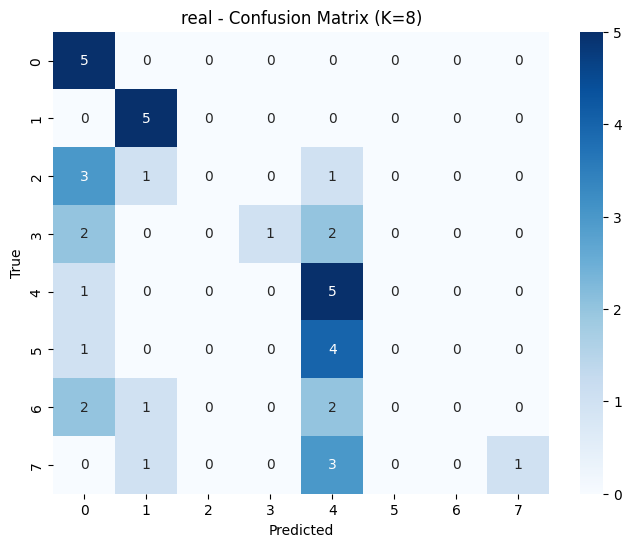

sil: Clustering accuracy = 0.425


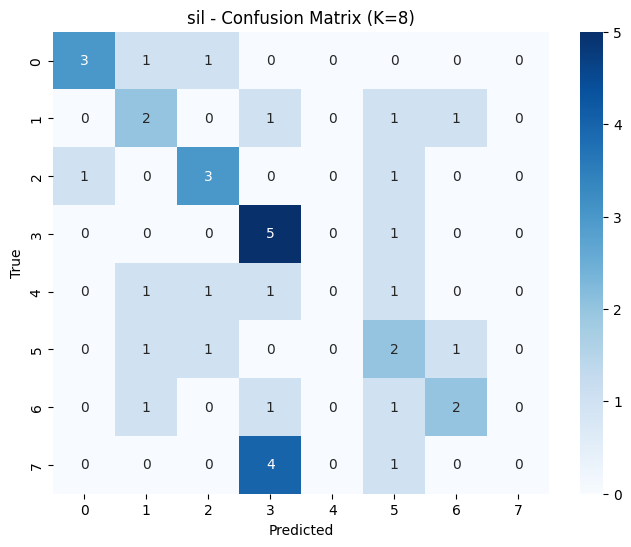

geon: Clustering accuracy = 0.367


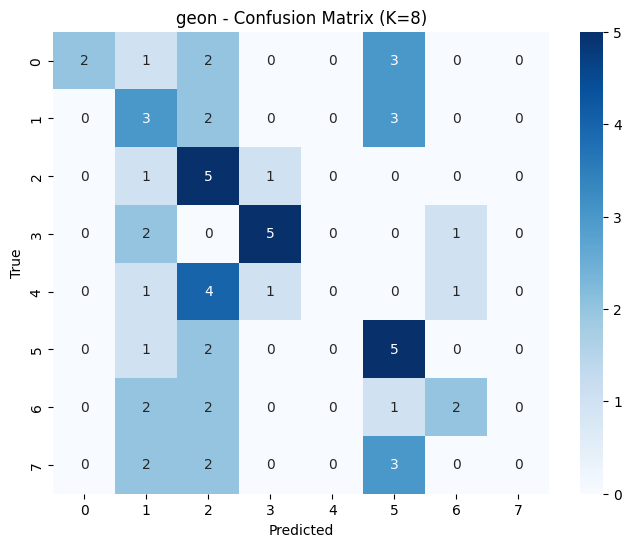

feature: Clustering accuracy = 0.310


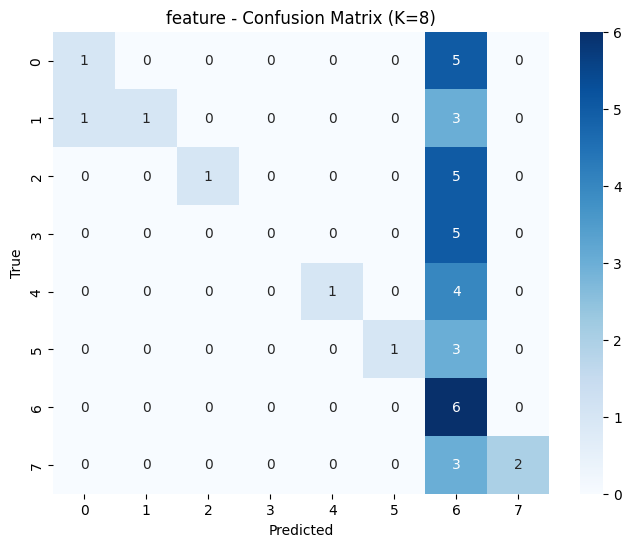

blur: Clustering accuracy = 0.476


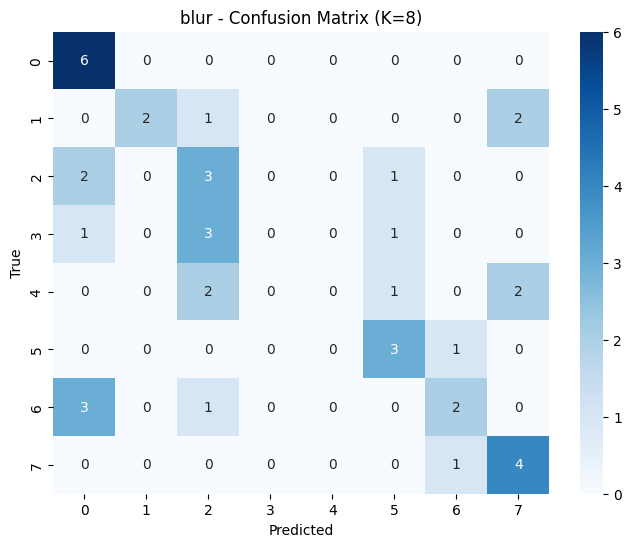

In [ ]:
cluster_labels_8 = {}

for cond, X in image_list.items():
    kmeans = KMeans(n_clusters=8, random_state=51, n_init='auto')
    labels = kmeans.fit_predict(X)
    cluster_labels_8[cond] = labels
    print(f"{cond}: K-means done (8 clusters)")

for cond in y_ints:
    true = y_ints[cond]
    clusters = cluster_labels_8[cond]

    acc, predicted = clustering_accuracy(true, clusters)
    print(f"{cond}: Clustering accuracy = {acc:.3f}")

    # Confusion matrix
    cm = confusion_matrix(true, predicted, labels=np.unique(true))

    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=np.unique(true), yticklabels=np.unique(true), cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"{cond} - Confusion Matrix (K=8)")
    plt.show()



### **HW3Q1 4. B**
See above, also did clustering accuracy for A. for what it was worth

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3), #Added cause ResNet is RGB
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  # ImageNet
                         std=[0.229, 0.224, 0.225])
])

# Custom dataset for a folder of images
class ImageDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images  # list of PIL Images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img = self.images[idx]
        if self.transform:
            img = self.transform(img)
        return img, self.labels[idx]

resnet = models.resnet18(pretrained=True)
resnet.eval()  # set to evaluation mode

# Remove final fully connected layer (get penultimate layer)
feature_extractor = nn.Sequential(*list(resnet.children())[:-1])  # outputs (batch, 512, 1, 1)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
feature_extractor = feature_extractor.to(device)

features_dict = {}

for cond in image_list:
    # Convert images from numpy array to PIL
    pil_images = [Image.fromarray((img*255).astype(np.uint8)) for img in image_list[cond]]  # scale if normalized
    labels = y_ints[cond]

    dataset = ImageDataset(pil_images, labels, transform=transform)
    loader = DataLoader(dataset, batch_size=10, shuffle=False)

    all_features = []

    with torch.no_grad():
        for batch_imgs, _ in loader:
            batch_imgs = batch_imgs.to(device)
            feats = feature_extractor(batch_imgs)  # shape: (batch, 512, 1, 1)
            feats = feats.view(feats.size(0), -1)  # flatten to (batch, 512)
            all_features.append(feats.cpu().numpy())

    features_dict[cond] = np.vstack(all_features)
    print(f"{cond}: extracted features shape {features_dict[cond].shape}")

real: extracted features shape (41, 512)
sil: extracted features shape (40, 512)
geon: extracted features shape (60, 512)
feature: extracted features shape (42, 512)
blur: extracted features shape (42, 512)


real: Clustering accuracy = 0.463


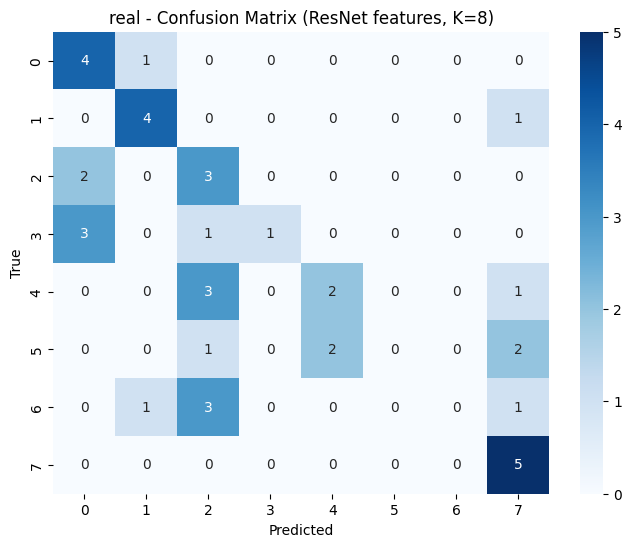

sil: Clustering accuracy = 0.625


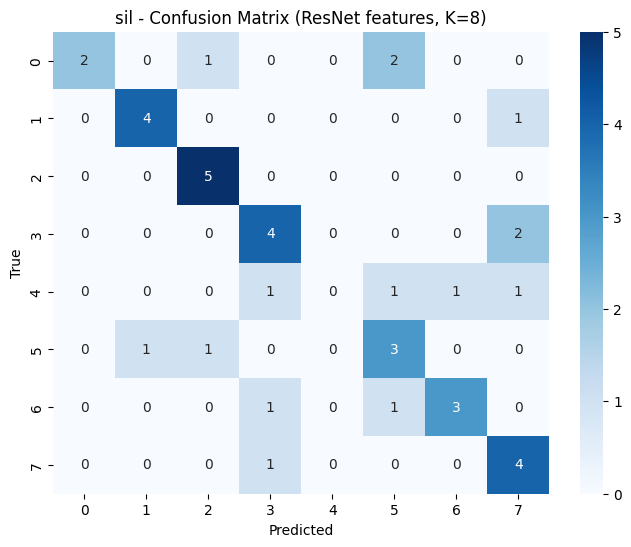

geon: Clustering accuracy = 0.467


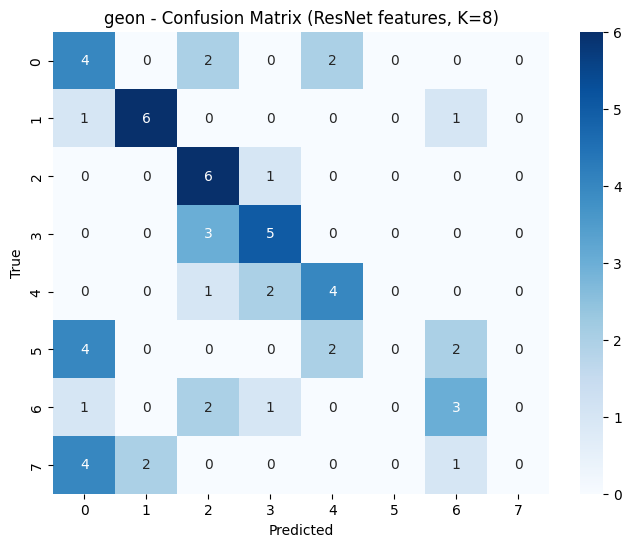

feature: Clustering accuracy = 0.405


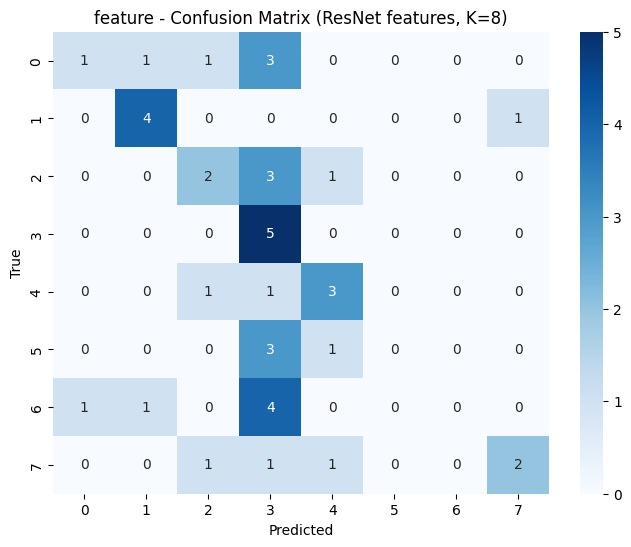

blur: Clustering accuracy = 0.452


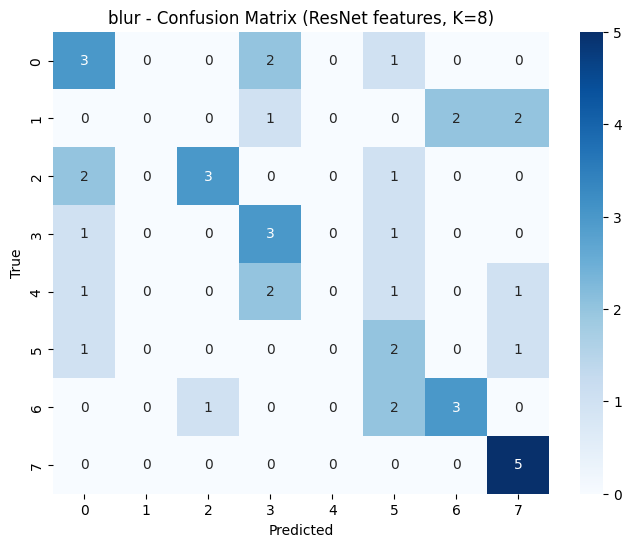

In [ ]:
for cond in features_dict:
    X = features_dict[cond]
    labels_true = y_ints[cond]

    kmeans = KMeans(n_clusters=8, random_state=51, n_init='auto')
    clusters = kmeans.fit_predict(X)

    acc, predicted = clustering_accuracy(labels_true, clusters)
    print(f"{cond}: Clustering accuracy = {acc:.3f}")

    # Confusion matrix
    cm = confusion_matrix(labels_true, predicted, labels=np.unique(labels_true))

    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=np.unique(labels_true),
                yticklabels=np.unique(labels_true), cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"{cond} - Confusion Matrix (ResNet features, K=8)")
    plt.show()

### **HW3Q1 4. C**
See above


--- Condition: real ---
PCA kept 30 components (shape (41, 30))
Selected k (min BIC) = 5
Clustering accuracy (majority mapping) = 0.317


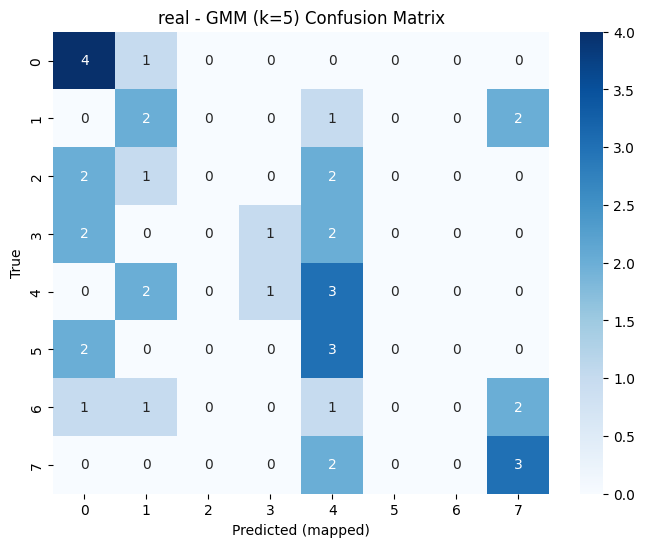


--- Condition: sil ---
PCA kept 30 components (shape (40, 30))
Selected k (min BIC) = 4
Clustering accuracy (majority mapping) = 0.400


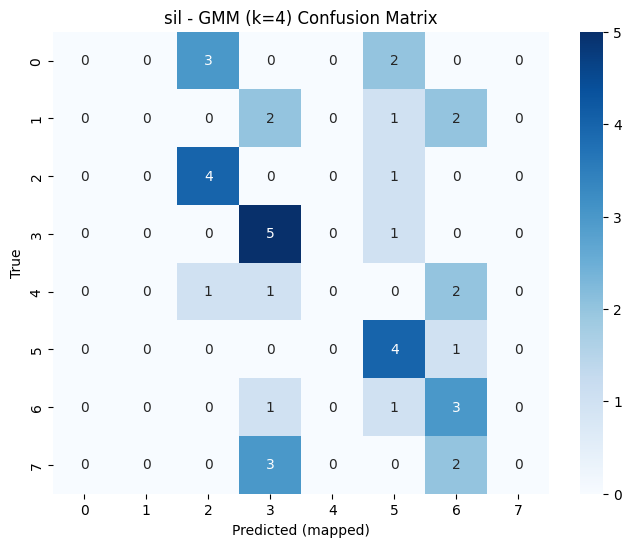


--- Condition: geon ---
PCA kept 35 components (shape (60, 35))
Selected k (min BIC) = 6
Clustering accuracy (majority mapping) = 0.433


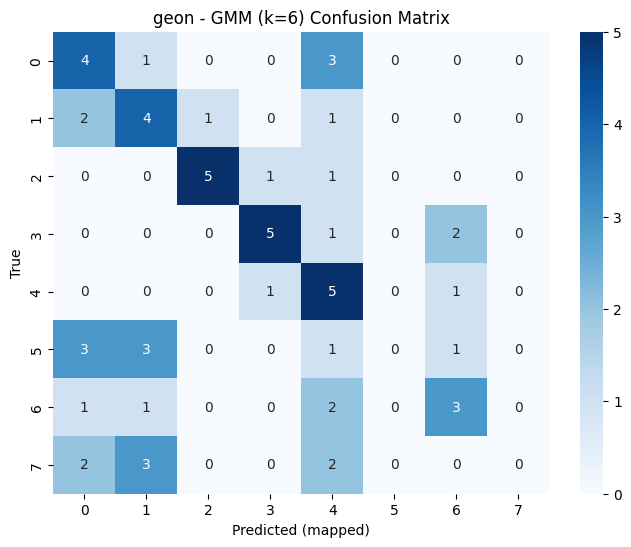


--- Condition: feature ---
PCA kept 31 components (shape (42, 31))
Selected k (min BIC) = 2
Clustering accuracy (majority mapping) = 0.238


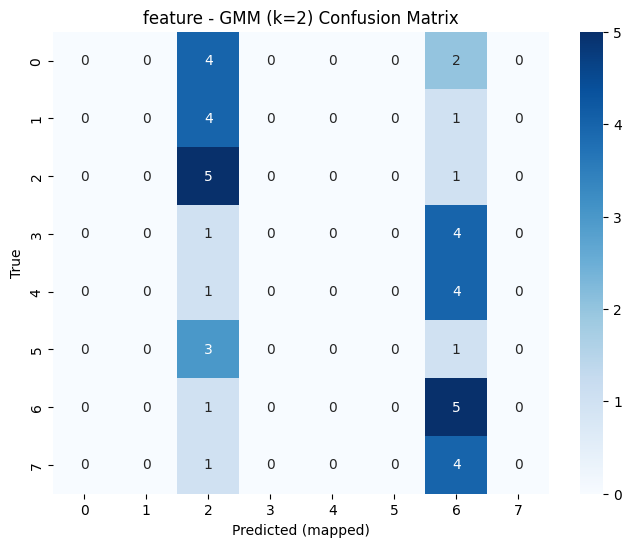


--- Condition: blur ---
PCA kept 15 components (shape (42, 15))
Selected k (min BIC) = 8
Clustering accuracy (majority mapping) = 0.500


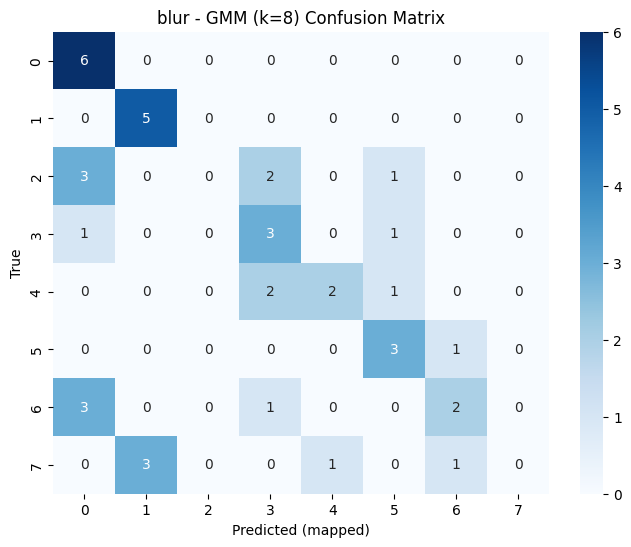


=== Summary ===
real: best_k=5, accuracy=0.317
sil: best_k=4, accuracy=0.400
geon: best_k=6, accuracy=0.433
feature: best_k=2, accuracy=0.238
blur: best_k=8, accuracy=0.500


In [ ]:
from sklearn.mixture import GaussianMixture

# Parameters: adjust as needed
k_min, k_max = 1, 12   # range of clusters to test
covariance_type = 'full'  # 'full' (flexible), 'diag' (faster), 'tied', or 'spherical'
random_state = 51

def majority_map(true_labels, cluster_labels):
    """Map each cluster id to the majority true label inside that cluster."""
    true = np.array(true_labels)
    clusters = np.array(cluster_labels)
    mapping = {}
    for c in np.unique(clusters):
        mask = (clusters == c)
        # mode returns array; take first element
        mapping[c] = mode(true[mask], keepdims=True).mode[0]
    return mapping

def clustering_accuracy(true_labels, cluster_labels):
    mapping = majority_map(true_labels, cluster_labels)
    preds = np.array([mapping[c] for c in cluster_labels])
    return accuracy_score(true_labels, preds), preds

# Containers for results
best_k_per_cond = {}
gmm_models = {}
cluster_preds = {}
accuracies = {}

for cond in image_list:
    print(f"\n--- Condition: {cond} ---")
    pca = PCA(n_components=0.95, svd_solver='full')
    X_reduced = pca.fit_transform(image_list[cond])
    print(f"PCA kept {pca.n_components_} components (shape {X_reduced.shape})")

    #Grid search for best k by BIC
    bic_scores = []
    k_list = list(range(k_min, k_max+1))
    gmms = {}
    for k in k_list:
        # skip k > n_samples
        if k >= X_reduced.shape[0]:
            bic_scores.append(np.inf)
            continue
        gmm = GaussianMixture(n_components=k,
                              covariance_type=covariance_type,
                              random_state=random_state,
                              init_params='kmeans',
                              n_init=3)  # some re-inits for stability
        gmm.fit(X_reduced)
        bic = gmm.bic(X_reduced)
        bic_scores.append(bic)
        gmms[k] = gmm
        # optional: print intermediate
        # print(f"  k={k}: BIC={bic:.1f}")

    # select k with minimum BIC
    bic_arr = np.array(bic_scores)
    best_idx = np.argmin(bic_arr)
    best_k = k_list[best_idx]
    best_k_per_cond[cond] = best_k
    best_gmm = gmms.get(best_k)
    gmm_models[cond] = best_gmm
    print(f"Selected k (min BIC) = {best_k}")

    # Predict cluster assignments
    labels = best_gmm.predict(X_reduced)
    cluster_preds[cond] = labels

    # Compute accuracy after mapping clusters -> true labels
    acc, predicted_labels = clustering_accuracy(y_ints[cond], labels)
    accuracies[cond] = acc
    print(f"Clustering accuracy (majority mapping) = {acc:.3f}")

    # Confusion matrix plot
    # Build confusion matrix with rows=true, cols=predicted-mapped
    # predicted_labels are the mapped class labels (strings or ints)
    unique_true = np.unique(y_ints[cond])
    cm = confusion_matrix(y_ints[cond], predicted_labels, labels=unique_true)

    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d',
                xticklabels=unique_true, yticklabels=unique_true, cmap='Blues')
    plt.xlabel("Predicted (mapped)")
    plt.ylabel("True")
    plt.title(f"{cond} - GMM (k={best_k}) Confusion Matrix")
    plt.show()

# Summary print
print("\n=== Summary ===")
for cond in image_list.keys():
    print(f"{cond}: best_k={best_k_per_cond[cond]}, accuracy={accuracies[cond]:.3f}")


### **HW3Q1 5. A**

See above, confusion matrix generated for reference


--- Condition: real ---
PCA -> 30 dimensions
Clustering accuracy = 0.415


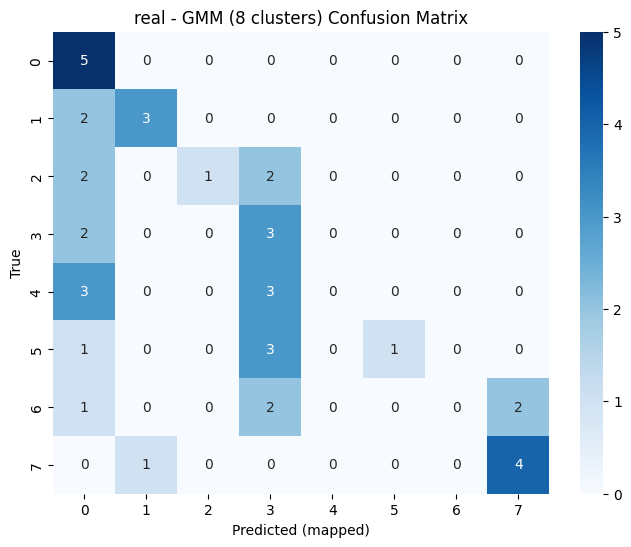


--- Condition: sil ---
PCA -> 30 dimensions
Clustering accuracy = 0.500


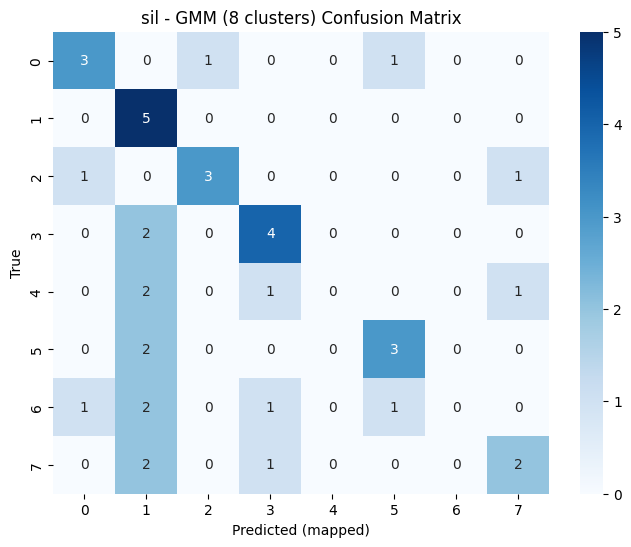


--- Condition: geon ---
PCA -> 35 dimensions
Clustering accuracy = 0.467


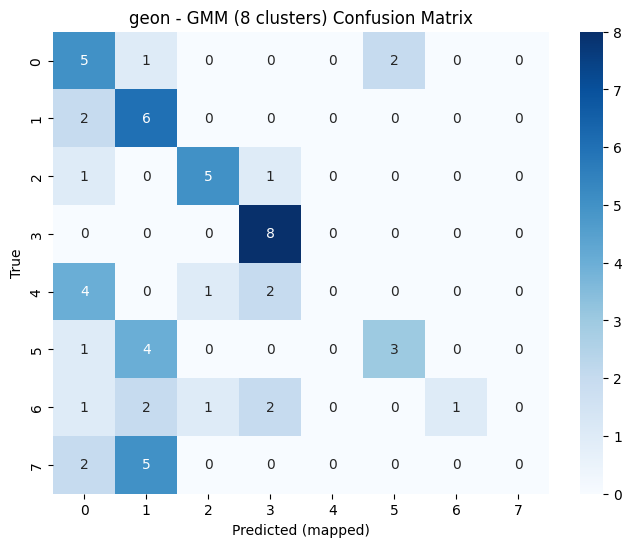


--- Condition: feature ---
PCA -> 31 dimensions
Clustering accuracy = 0.381


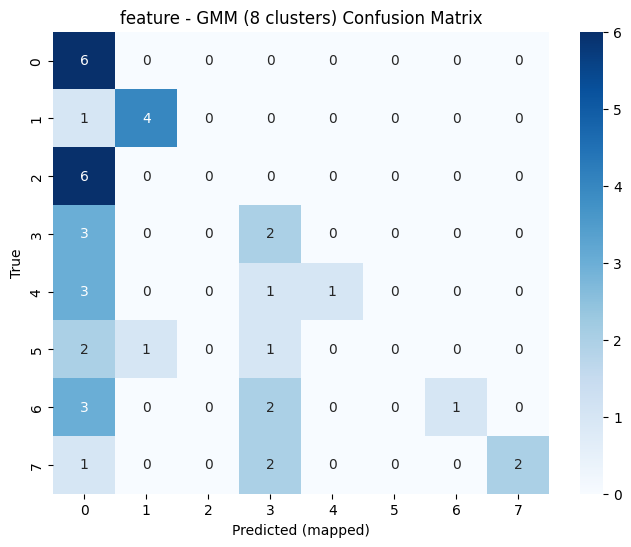


--- Condition: blur ---
PCA -> 15 dimensions
Clustering accuracy = 0.500


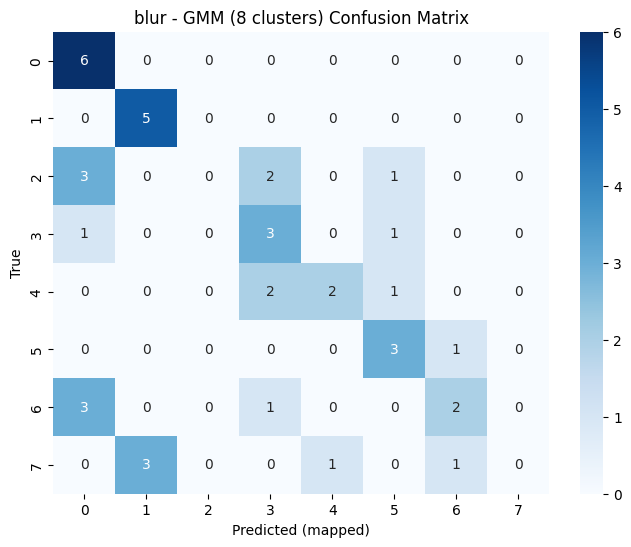


=== Summary ===
real: accuracy=0.415
sil: accuracy=0.500
geon: accuracy=0.467
feature: accuracy=0.381
blur: accuracy=0.500


In [ ]:
accuracies = {}
pcas = {}
gmms = {}

for cond, X in image_list.items():
    print(f"\n--- Condition: {cond} ---")

    # 1. PCA to retain 95% variance
    pca = PCA(n_components=0.95, svd_solver='full')
    X_reduced = pca.fit_transform(X)
    print(f"PCA -> {pca.n_components_} dimensions")

    pcas[cond] = pca

    # 2. Fit GMM with 8 clusters (ground truth)
    gmm = GaussianMixture(
        n_components=8,
        covariance_type='full',
        random_state=51,
        init_params='kmeans',
        n_init=3
    )
    gmm.fit(X_reduced)

    # 3. Predict cluster assignments
    clusters = gmm.predict(X_reduced)

    gmms[cond] = gmm

    # 4. Compute accuracy using best mapping
    acc, mapped_preds = clustering_accuracy(y_ints[cond], clusters)
    accuracies[cond] = acc
    print(f"Clustering accuracy = {acc:.3f}")

    # 5. Confusion matrix
    unique_true = np.unique(y_ints[cond])
    cm = confusion_matrix(y_ints[cond], mapped_preds, labels=unique_true)

    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d',
                xticklabels=unique_true,
                yticklabels=unique_true,
                cmap='Blues')
    plt.xlabel("Predicted (mapped)")
    plt.ylabel("True")
    plt.title(f"{cond} - GMM (8 clusters) Confusion Matrix")
    plt.show()

print("\n=== Summary ===")
for cond, acc in accuracies.items():
    print(f"{cond}: accuracy={acc:.3f}")

### **HW3Q1 5. B**
See above


--- Generating samples for real ---


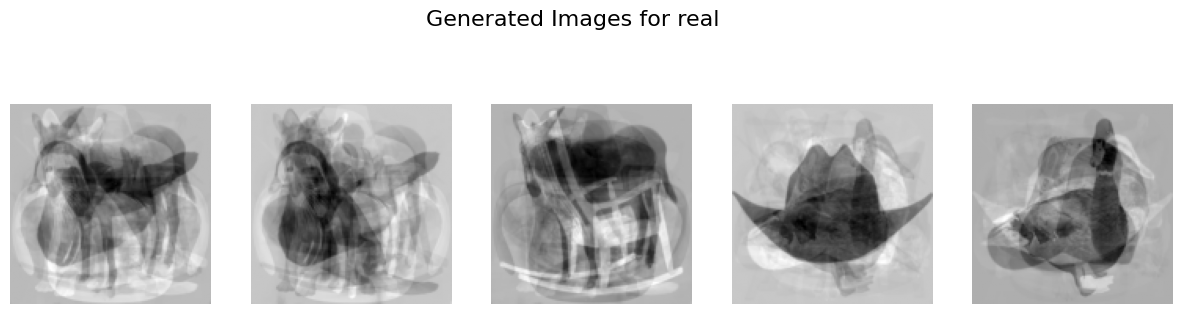


--- Generating samples for sil ---


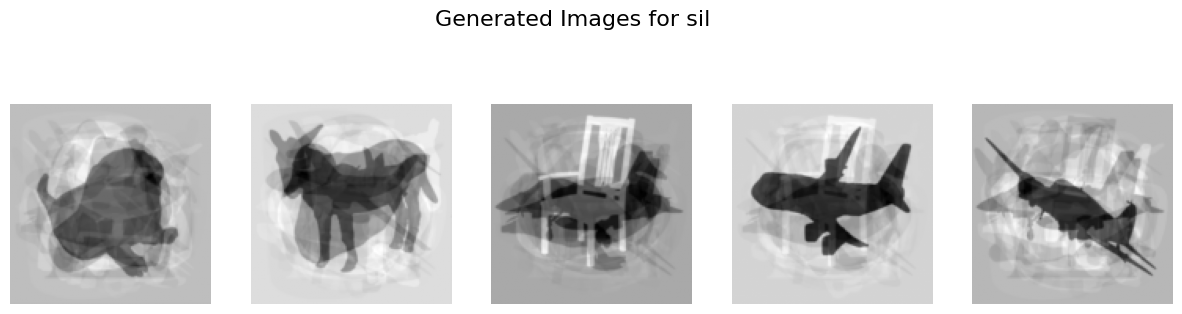


--- Generating samples for geon ---


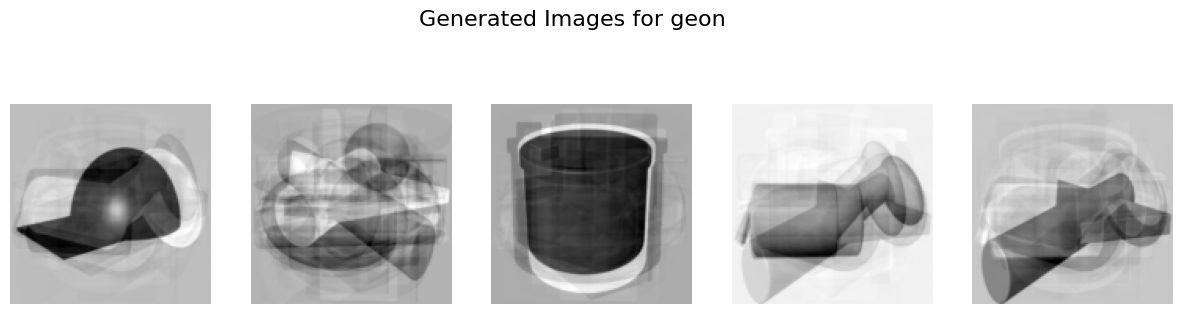


--- Generating samples for feature ---


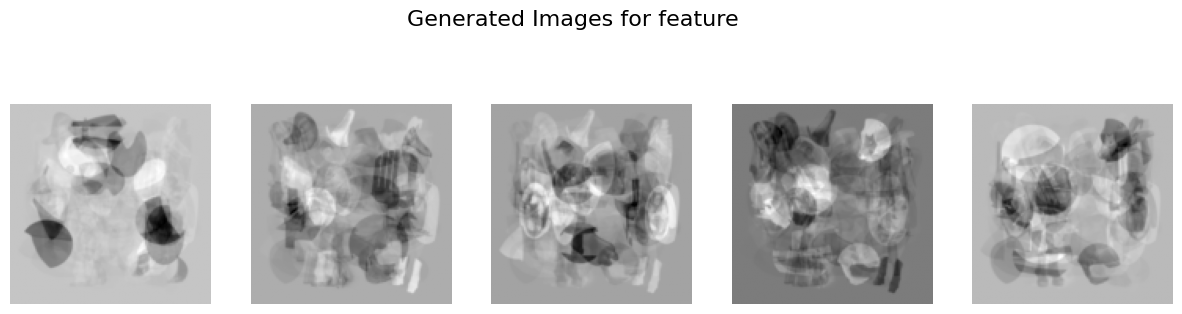


--- Generating samples for blur ---


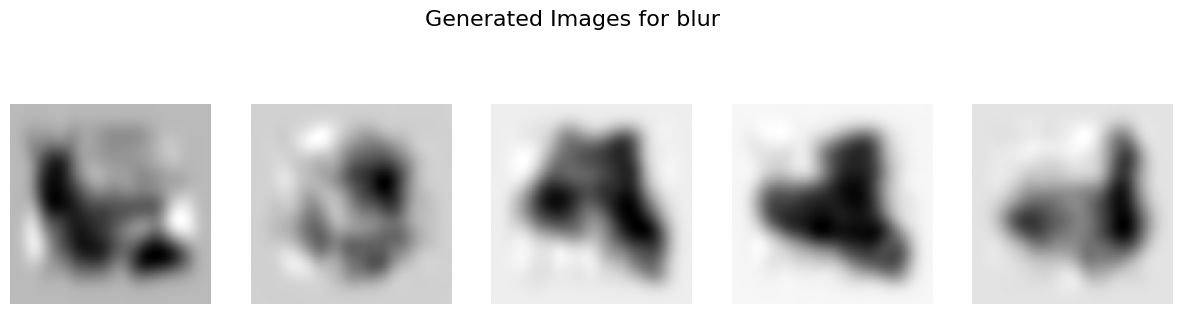

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

NUM_SAMPLES = 5

for cond in image_list:
    print(f"\n--- Generating samples for {cond} ---")

    # Grab the PCA and GMM for this condition
    pca = pcas[cond]
    gmm = gmms[cond]

    # The images in image_list are flattened grayscale images of IMAGE_SIZE
    # So, the shape for plotting is IMAGE_SIZE
    plot_shape = IMAGE_SIZE

    # Sample in PCA space
    sampled_reduced, _ = gmm.sample(NUM_SAMPLES)

    # Inverse-transform back to preprocessed image space
    reconstructed_flat = pca.inverse_transform(sampled_reduced)

    # Reshape back to the 2D image shape for plotting
    reconstructed_imgs = reconstructed_flat.reshape(NUM_SAMPLES, *plot_shape)

    # Plot the results
    fig, axes = plt.subplots(1, NUM_SAMPLES, figsize=(15, 4))
    fig.suptitle(f"Generated Images for {cond}", fontsize=16)

    for i in range(NUM_SAMPLES):
        # Since the images are grayscale, always use cmap='gray' and the 2D plot_shape
        axes[i].imshow(reconstructed_imgs[i], cmap='gray')
        axes[i].axis('off')

    plt.show()

### **HW3Q1 5. C**

They're quite scary looking. Like the void is looking back at me


--- Condition: real ---
Clustering accuracy = 0.463


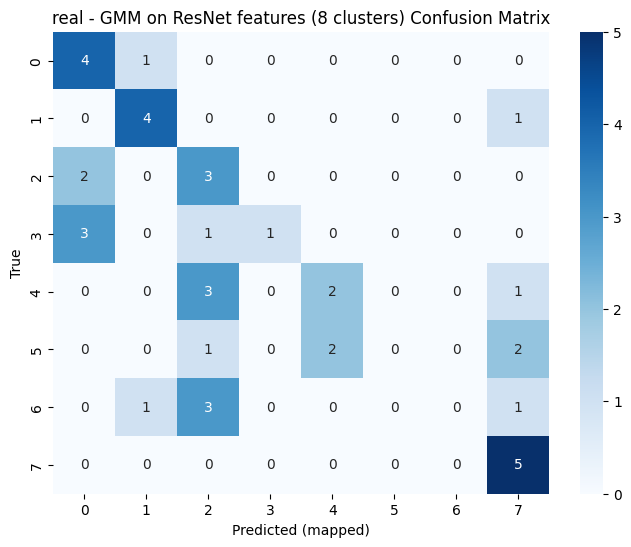


--- Condition: sil ---
Clustering accuracy = 0.625


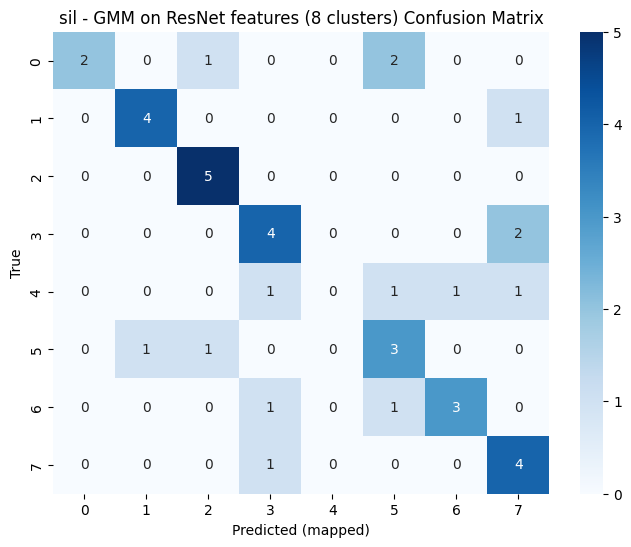


--- Condition: geon ---
Clustering accuracy = 0.567


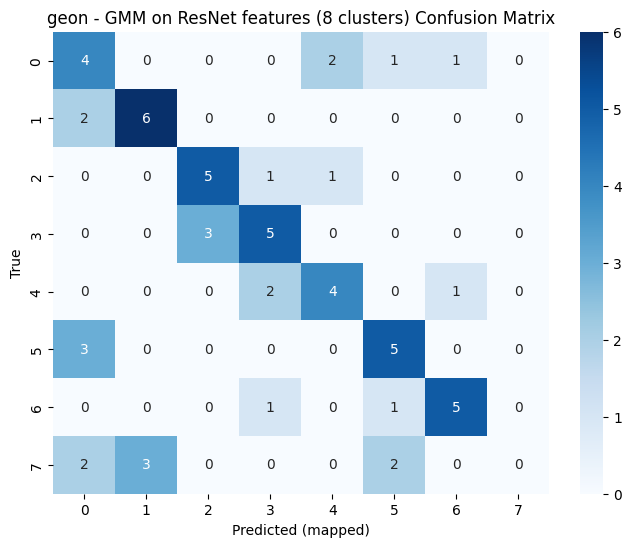


--- Condition: feature ---
Clustering accuracy = 0.405


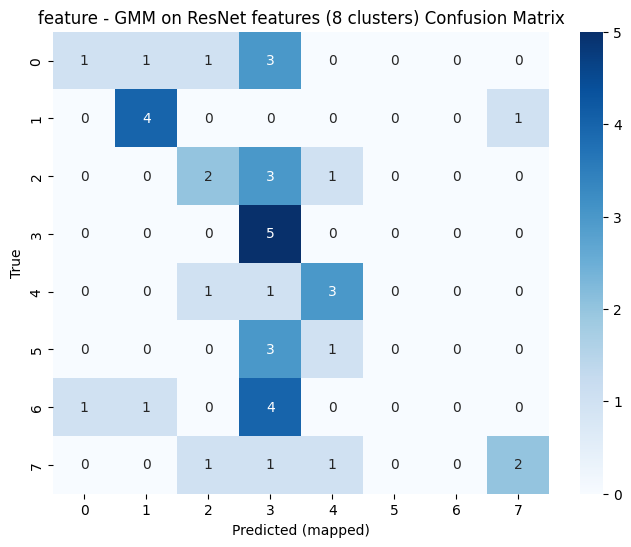


--- Condition: blur ---
Clustering accuracy = 0.452


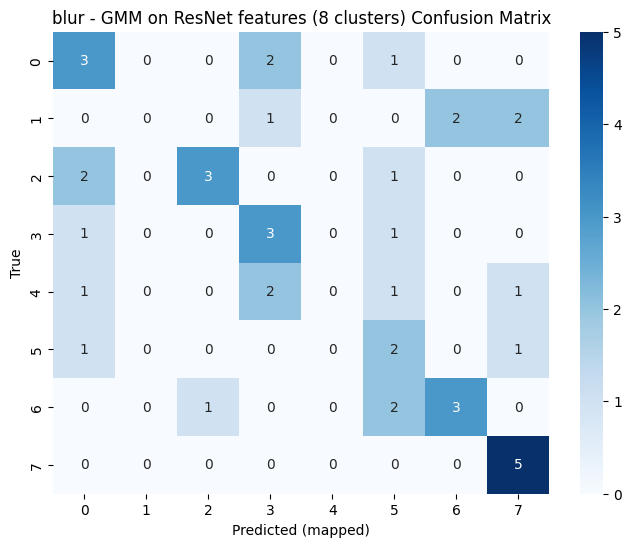


=== Summary of GMM clustering accuracies (ResNet features) ===
real: accuracy = 0.463
sil: accuracy = 0.625
geon: accuracy = 0.567
feature: accuracy = 0.405
blur: accuracy = 0.452


In [ ]:
accuracies_resnet = {}
cluster_preds_resnet = {}
gmm_resnet_models = {}

for cond in features_dict:  # features_dict = precomputed ResNet features
    print(f"\n--- Condition: {cond} ---")

    X = features_dict[cond]         # ResNet features
    true_labels = y_ints[cond]  # ground truth labels

    # Fit GMM with 8 clusters
    gmm = GaussianMixture(
        n_components=8,
        covariance_type='full',
        random_state=51,
        init_params='kmeans',
        n_init=3
    )
    gmm.fit(X)
    gmm_resnet_models[cond] = gmm

    # Predict cluster assignments
    clusters = gmm.predict(X)
    cluster_preds_resnet[cond] = clusters

    # Compute accuracy
    acc, mapped_preds = clustering_accuracy(true_labels, clusters)
    accuracies_resnet[cond] = acc
    print(f"Clustering accuracy = {acc:.3f}")

    # Confusion matrix
    unique_true = np.unique(true_labels)
    cm = confusion_matrix(true_labels, mapped_preds, labels=unique_true)

    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d',
                xticklabels=unique_true,
                yticklabels=unique_true,
                cmap='Blues')
    plt.xlabel("Predicted (mapped)")
    plt.ylabel("True")
    plt.title(f"{cond} - GMM on ResNet features (8 clusters) Confusion Matrix")
    plt.show()

# Summary of accuracies
print("\n=== Summary of GMM clustering accuracies (ResNet features) ===")
for cond, acc in accuracies_resnet.items():
    print(f"{cond}: accuracy = {acc:.3f}")

### **HW3Q1 5. D**
Done above

### **HW3Q1 6**

Yeah not doing that in this already behemoth code. See you in HW3Q1 pt 2 electric boogaloo